In [1]:
import tensorflow as tf
from tensorflow import keras

import matplotlib.pyplot as plt
%matplotlib inline

import numpy as np

In [2]:
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

In [3]:
len(X_train)

60000

In [4]:
len(X_test)

10000

In [5]:
X_train[0].shape

(28, 28)

In [6]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

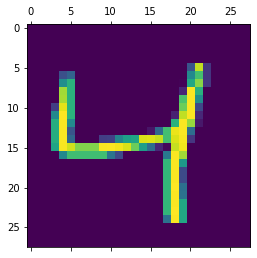

In [7]:
plt.matshow(X_train[2])

In [18]:
X_train = X_train/255
X_test = X_test/255

In [19]:
y_train[2]

4

In [20]:
X_test.shape

(10000, 28, 28)

In [21]:
X_train_flattened = X_train.reshape(len(X_train),28*28)
X_test_flattened = X_test.reshape(len(X_test),28*28)
X_train_flattened

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [22]:
X_test_flattened.shape

(10000, 784)

In [23]:
#Creating a simple neural network
#with input layer of inputs and 10 outputs

In [24]:
model = keras.Sequential([
    keras.layers.Dense(10, input_shape=(784,), activation = 'sigmoid')
])

model.compile(
    optimizer = 'adam',
    loss ='sparse_categorical_crossentropy',
    metrics = ['accuracy']
)
    
model.fit(X_train_flattened, y_train, epochs = 5)

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.7147 - accuracy: 0.8126
Epoch 2/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3031 - accuracy: 0.9157
Epoch 3/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2894 - accuracy: 0.9204
Epoch 4/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2679 - accuracy: 0.9248
Epoch 5/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2652 - accuracy: 0.9269


In [ ]:
model.evaluate(X_test_flattened, y_test)

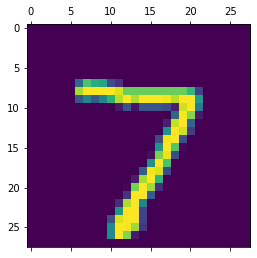

In [26]:
plt.matshow(X_test[0])

In [27]:
y_predicted = model.predict(X_test_flattened)

y_predicted[0]

array([1.8802583e-02, 3.2115113e-07, 6.8595886e-02, 9.7351885e-01,
       2.6078522e-03, 1.3304958e-01, 1.3792419e-06, 9.9987751e-01,
       9.7224712e-02, 7.4388140e-01], dtype=float32)

In [29]:
np.argmax(y_predicted[0])

7

In [36]:
y_predicted_labels = [np.argmax(i) for i in y_predicted]
y_predicted_labels[:5]

[7, 2, 1, 0, 4]

In [38]:
cm = tf.math.confusion_matrix(labels = y_test, predictions = y_predicted_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 956,    0,    1,    5,    0,    6,    4,    3,    4,    1],
       [   0, 1110,    3,    2,    0,    1,    4,    2,   13,    0],
       [   3,   10,  916,   23,   10,    3,   11,   11,   42,    3],
       [   1,    0,   15,  938,    0,   16,    2,   12,   18,    8],
       [   1,    1,    5,    2,  923,    0,    7,    4,    9,   30],
       [   7,    1,    4,   45,    9,  775,    8,    9,   29,    5],
       [   7,    3,    7,    2,    8,   18,  907,    2,    4,    0],
       [   1,    5,   20,   10,    8,    0,    0,  952,    3,   29],
       [   3,    7,    6,   31,    9,   26,    6,   13,  862,   11],
       [   9,    7,    1,   12,   32,    5,    0,   22,    7,  914]])>

Text(69.0, 0.5, 'Actual')

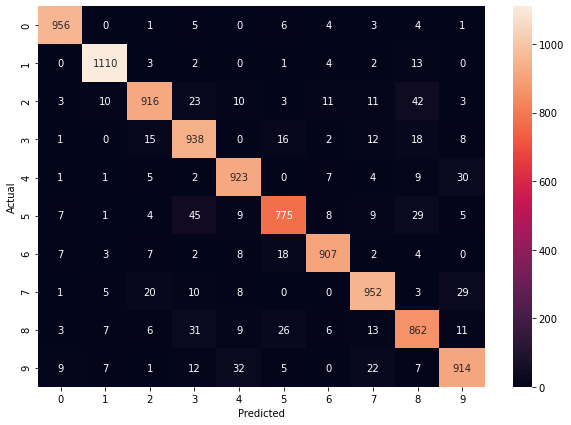

In [41]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot = True, fmt = 'd')
plt.xlabel('Predicted')
plt.ylabel('Actual')

In [43]:
model = keras.Sequential([
    keras.layers.Dense(100, input_shape=(784,), activation = 'relu'),
    keras.layers.Dense(10,activation = 'sigmoid')
])

model.compile(
    optimizer = 'adam',
    loss ='sparse_categorical_crossentropy',
    metrics = ['accuracy']
)
    
model.fit(X_train_flattened, y_train, epochs = 5)

Epoch 1/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.4450 - accuracy: 0.8759
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1283 - accuracy: 0.9620
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0832 - accuracy: 0.9754
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0641 - accuracy: 0.9810
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0483 - accuracy: 0.9855


In [44]:
model.evaluate(X_test_flattened, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0800 - accuracy: 0.9756


[0.07995405793190002, 0.975600004196167]

In [45]:
#inbuilt keras flattening

model = keras.Sequential([
    keras.layers.Flatten(input_shape = (28,28)),
    keras.layers.Dense(100, activation = 'relu'),
    keras.layers.Dense(10,activation = 'sigmoid')
])

model.compile(
    optimizer = 'adam',
    loss ='sparse_categorical_crossentropy',
    metrics = ['accuracy']
)
    
model.fit(X_train, y_train, epochs = 5)

Epoch 1/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.4605 - accuracy: 0.8693
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1283 - accuracy: 0.9623
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0840 - accuracy: 0.9757
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0643 - accuracy: 0.9802
Epoch 5/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0507 - accuracy: 0.9846
